In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the Diabetes dataset
diabetes = load_diabetes()
diabetes_df = pd.DataFrame(data=np.c_[diabetes['data'], diabetes['target']],
                            columns=np.append(diabetes['feature_names'], 'target'))

In [3]:
# Feature selection and feature engineering
features = diabetes['feature_names']

In [4]:
# Split the data into training and testing sets
train_data, test_data = train_test_split(diabetes_df, test_size=0.2, random_state=42)

In [5]:
# Train a GradientBoostingRegressor model
def train_gradient_boosting(X_train, y_train, n_estimators=100, max_depth=3, learning_rate=0.1):
    gb_model = GradientBoostingRegressor(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, random_state=42)
    gb_model.fit(X_train, y_train)
    return gb_model

In [6]:
# Evaluate the model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2

In [7]:
# Model tweaking, regularization, and hyperparameter tuning
def hyperparameter_tuning(X_train, y_train):
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 4, 5],
        'learning_rate': [0.05, 0.1, 0.2],
    }
    gb_model = GradientBoostingRegressor(random_state=42)
    grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    return grid_search.best_params_

In [8]:
# Making Predictions with test data
def make_predictions(model, X_test, features):
    predictions = model.predict(X_test)
    results_df = pd.DataFrame({'Actual': test_data['target'].values, 'Predicted': predictions})
    return results_df

In [9]:
# Preprocess the training data
X_train, y_train = train_data[features], train_data['target']

In [10]:
# Train a GradientBoostingRegressor model
gb_model = train_gradient_boosting(X_train, y_train)

In [11]:
# Evaluate the model
X_test, y_test = test_data[features], test_data['target']
mse, r2 = evaluate_model(gb_model, X_test, y_test)
print(f'Mean Squared Error of the model on the test set: {mse:.2f}')
print(f'R2 Score of the model on the test set: {r2:.2f}')

Mean Squared Error of the model on the test set: 2898.44
R2 Score of the model on the test set: 0.45


In [12]:
# Hyperparameter tuning
best_params = hyperparameter_tuning(X_train, y_train)
print('\nBest Hyperparameters:', best_params)


Best Hyperparameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 50}


In [13]:
# Make predictions with test data
results_df = make_predictions(gb_model, X_test, features)
print('\nTest Data Predictions:')
print(results_df)


Test Data Predictions:
    Actual   Predicted
0    219.0  161.288904
1     70.0  190.524837
2    202.0  170.531022
3    230.0  285.060727
4    111.0  126.499966
..     ...         ...
84   153.0   77.681176
85    98.0   70.507958
86    37.0   85.560063
87    63.0   91.883000
88   184.0  162.286943

[89 rows x 2 columns]


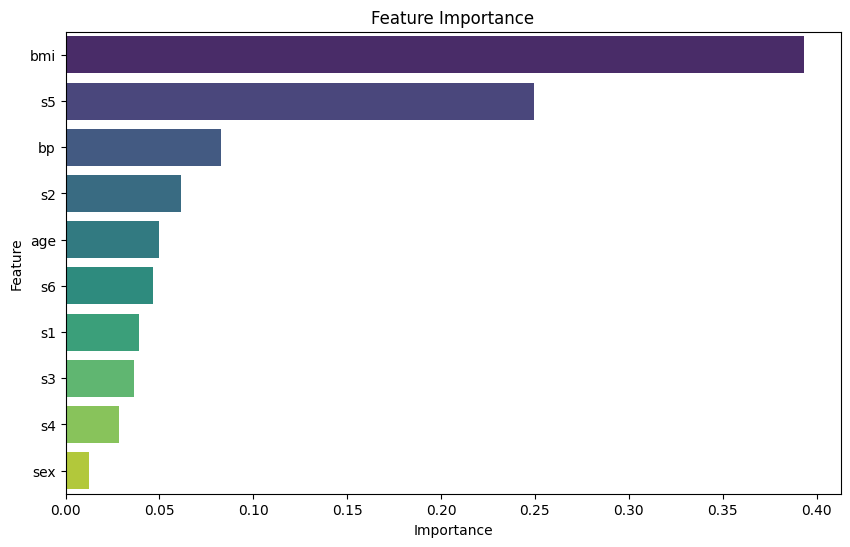

In [14]:
# Visualize feature importance
feature_importance = pd.DataFrame({'Feature': features, 'Importance': gb_model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title('Feature Importance')
plt.show()